In [1]:
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import xavier_initializer
import tensorflow as tf
import mnist_handling as mn

tf.set_random_seed(66666)

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

xs = tf.placeholder(tf.float32, [None, 784])
ys = tf.placeholder(tf.float32, [None, 10])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

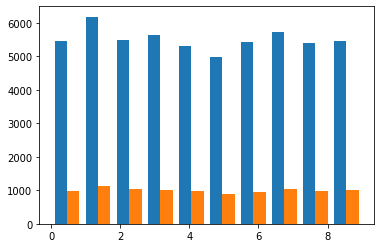

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist((np.argmax(mnist.train.labels,axis = 1),np.argmax(mnist.test.labels,axis = 1)))
plt.show()

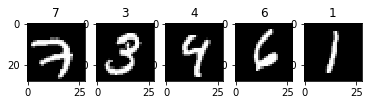

In [3]:
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(np.squeeze(np.reshape(mnist.train.images[i], newshape=[28,28])), cmap='gray')
  plt.title(np.argmax(mnist.train.labels[i],axis = 0))
plt.show()

In [0]:
def conv_net(data):
  # print(data.get_shape())
  # input = tf.reshape(data, [-1, 28, 28, 1])
  # print("hello mr sandman", tf.shape(data))
  
  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=data,
      filters=32,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #2
  conv2 = tf.layers.conv2d(
      inputs=conv1,
      filters=32,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  pool1 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Convolutional Layer #3
  conv3 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #4
  conv4 = tf.layers.conv2d(
      inputs=conv3,
      filters=64,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #5
  conv5 = tf.layers.conv2d(
      inputs=conv4,
      filters=128,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # Convolutional Layer #6
  conv6 = tf.layers.conv2d(
      inputs=conv5,
      filters=10,
      kernel_size=[3, 3],
      padding="valid",
      activation=tf.nn.relu)

  # pool2 = tf.layers.max_pooling2d(inputs=conv6, pool_size=[4, 4], strides=4)
  pool2 = tf.reduce_max(input_tensor = conv6, axis = [1,2])

  flat = tf.reshape(pool2, [-1, 10])

  # prediction
  predictions = tf.nn.softmax(flat)
  return predictions

In [5]:
predictions = conv_net(mn.tf_complicater(xs))

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(predictions), reduction_indices=[1]))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=predictions, labels=ys)

train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

# compute the accuracy
correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(ys, 1))

accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

tmp = 0
loss_log = []

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


In [6]:
import mnist_handling as mn
import time
t = time.clock()
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for i in range(30000):
        batch_xs, batch_ys = mnist.train.next_batch(256)
        batch_xs = batch_xs
        los = sess.run(cross_entropy, feed_dict={xs: batch_xs, ys: batch_ys})
        loss_log.append(los)

        sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})

        if (i + 1) % 100 == 0:
            
            acc = sess.run(accuracy, feed_dict={
                xs: mnist.test.images,
                ys: mnist.test.labels
            })
            print("steps : %d " % (i + 1), "accuracy: ", acc, "time: ", time.clock() - t, "  ", time.clock())
            t = time.clock()

steps : 100  accuracy:  0.6369 time:  6.411026    11.555954
steps : 200  accuracy:  0.6779 time:  2.3437329999999985    13.899967
steps : 300  accuracy:  0.6905 time:  2.432714999999998    16.333048
steps : 400  accuracy:  0.6941 time:  2.3093010000000014    18.644028
steps : 500  accuracy:  0.7761 time:  2.371829999999999    21.016042
steps : 600  accuracy:  0.7862 time:  2.319966000000001    23.337479
steps : 700  accuracy:  0.7878 time:  2.3680909999999997    25.705796
steps : 800  accuracy:  0.7905 time:  2.324932999999998    28.030912
steps : 900  accuracy:  0.7963 time:  2.3903890000000025    30.421522
steps : 1000  accuracy:  0.7959 time:  2.3506220000000013    32.773615
steps : 1100  accuracy:  0.7972 time:  2.4055950000000053    35.180659
steps : 1200  accuracy:  0.7963 time:  2.3030370000000033    37.483906
steps : 1300  accuracy:  0.8747 time:  2.3739550000000023    39.858146
steps : 1400  accuracy:  0.8809 time:  2.342901000000005    42.201253
steps : 1500  accuracy:  0.874

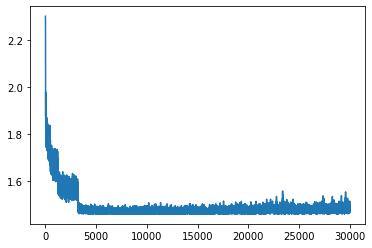

In [7]:
plt.plot([a.mean() for a in loss_log])
plt.show()

In [8]:
from skimage.transform import resize
im = batch_xs[13,:,:,0].copy()
# for i in range(len(im)):
#   for j in range(len(im[i])):
#     # im[i,j] = im[i,j]
#     im[i,j] = im[i,j] + random.gauss(0,0.1) 

im = resize
(batch_xs, output_shape =  (256,40,40,1), anti_aliasing=False)
plt.imshow(np.squeeze(im[3,:,:,0]), cmap='gray')

SyntaxError: ignored

In [0]:
5*1.75